In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.concatenate(successive_outputs, axis = 0)

In [2]:
print(final_output_sequence.shape)

(6400,)


# A recurrent layer in Keras

In [1]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()

model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data  . . . ')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

print(len(input_train))

print('Pad sequence (sample x time)')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

print('Input train shape: ', input_train.shape)

Loading data  . . . 
25000
Pad sequence (sample x time)
Input train shape:  (25000, 500)


In [10]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

history = model.fit(input_train, 
          y_train, 
          epochs = 10, 
          batch_size = 128, 
          validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 840us/step - loss: 0.6123 - acc: 0.6463 - val_loss: 0.4526 - val_acc: 0.8096
Epoch 2/10
20000/20000 [==============================] - 16s 818us/step - loss: 0.3931 - acc: 0.8318 - val_loss: 0.3702 - val_acc: 0.8466
Epoch 3/10
20000/20000 [==============================] - 16s 820us/step - loss: 0.2875 - acc: 0.8841 - val_loss: 0.4065 - val_acc: 0.8260
Epoch 4/10
20000/20000 [==============================] - 16s 805us/step - loss: 0.2287 - acc: 0.9113 - val_loss: 0.3701 - val_acc: 0.8484
Epoch 5/10
20000/20000 [==============================] - 16s 825us/step - loss: 0.1648 - acc: 0.9405 - val_loss: 0.3690 - val_acc: 0.8572
Epoch 6/10
20000/20000 [==============================] - 16s 821us/step - loss: 0.1059 - acc: 0.9651 - val_loss: 0.4155 - val_acc: 0.8544
Epoch 7/10
20000/20000 [==============================] - 16s 809us/step - loss: 0.0660 - acc: 0.9800 - val_loss: 0.4

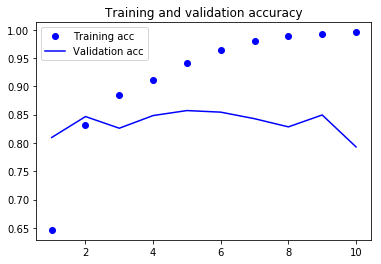

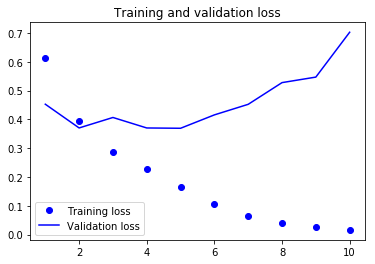

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Understanding the LSTM and GRU layers

In [4]:
from keras.layers import LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

history = model.fit(input_train, 
                    y_train, 
                    epochs = 10, 
                    batch_size = 128, 
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.4923 - acc: 0.7701 - val_loss: 0.3494 - val_acc: 0.8616
Epoch 2/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.2948 - acc: 0.8856 - val_loss: 0.3208 - val_acc: 0.8670
Epoch 3/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.2368 - acc: 0.9099 - val_loss: 0.2920 - val_acc: 0.8784
Epoch 4/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.2022 - acc: 0.9231 - val_loss: 0.6229 - val_acc: 0.8118
Epoch 5/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.1783 - acc: 0.9348 - val_loss: 0.2972 - val_acc: 0.8710
Epoch 6/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1615 - acc: 0.9408 - val_loss: 0.3301 - val_acc: 0.8524
Epoch 7/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.1466 - acc: 0.9494 - val_loss: 0.3150 - val_acc:

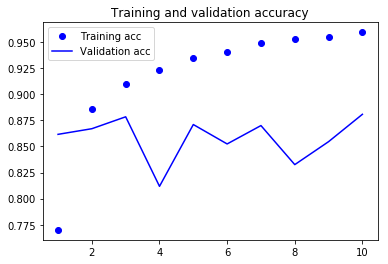

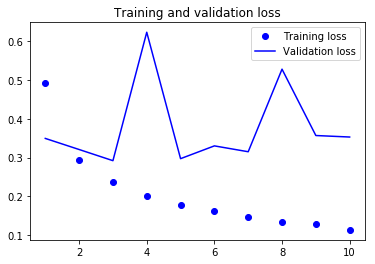

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()